In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [52]:
df = pd.read_csv("Initial-Demand-Outturn.csv",parse_dates=[0])
df.head()

,Settlement Date,Settlement Period,INDO
0,2017-01-01,1,27239
1,2017-01-01,2,27814
2,2017-01-01,3,27453
3,2017-01-01,4,26312
4,2017-01-01,5,25289


In [53]:
#Adjusting time 
d = dict(zip(range(1, 49),pd.timedelta_range('00:00:00', '23:30:00', freq='30T')))
#Adding time column 
df['time'] = pd.to_timedelta(df['Settlement Period'].map(d), unit='h')
df.head()

,Settlement Date,Settlement Period,INDO,time
0,2017-01-01,1,27239,00:00:00
1,2017-01-01,2,27814,00:30:00
2,2017-01-01,3,27453,01:00:00
3,2017-01-01,4,26312,01:30:00
4,2017-01-01,5,25289,02:00:00


In [54]:
df.head(53)
df.size

350192

In [55]:
#Let's add date and time together
df['datetime'] = pd.to_datetime(df['Settlement Date'] + df['time'])
#df = df.reset_index().set_index('datetime')
df.head(10)

,Settlement Date,Settlement Period,INDO,time,datetime
0,2017-01-01,1,27239,00:00:00,2017-01-01 00:00:00
1,2017-01-01,2,27814,00:30:00,2017-01-01 00:30:00
2,2017-01-01,3,27453,01:00:00,2017-01-01 01:00:00
3,2017-01-01,4,26312,01:30:00,2017-01-01 01:30:00
4,2017-01-01,5,25289,02:00:00,2017-01-01 02:00:00
5,2017-01-01,6,24616,02:30:00,2017-01-01 02:30:00
6,2017-01-01,7,23654,03:00:00,2017-01-01 03:00:00
7,2017-01-01,8,22806,03:30:00,2017-01-01 03:30:00
8,2017-01-01,9,22234,04:00:00,2017-01-01 04:00:00
9,2017-01-01,10,21928,04:30:00,2017-01-01 04:30:00


In [57]:
#for INDO Values
df['datetime']=df[['datetime']].drop_duplicates(keep='first')
#For ITSDO Values
#df['datetime']=df[['datetime']].drop_duplicates(keep='last')
df.head(50)


,Settlement Date,Settlement Period,INDO,time,datetime
0,2017-01-01,1,27239,00:00:00,2017-01-01 00:00:00
1,2017-01-01,2,27814,00:30:00,2017-01-01 00:30:00
2,2017-01-01,3,27453,01:00:00,2017-01-01 01:00:00
3,2017-01-01,4,26312,01:30:00,2017-01-01 01:30:00
4,2017-01-01,5,25289,02:00:00,2017-01-01 02:00:00
5,2017-01-01,6,24616,02:30:00,2017-01-01 02:30:00
6,2017-01-01,7,23654,03:00:00,2017-01-01 03:00:00
7,2017-01-01,8,22806,03:30:00,2017-01-01 03:30:00
8,2017-01-01,9,22234,04:00:00,2017-01-01 04:00:00
9,2017-01-01,10,21928,04:30:00,2017-01-01 04:30:00


In [58]:
df = df.dropna()

In [59]:
df = df.reset_index().set_index('datetime')
df.head(3)

,index,Settlement Date,Settlement Period,INDO,time
datetime,,,,,
2017-01-01 00:00:00,0,2017-01-01,1,27239,00:00:00
2017-01-01 00:30:00,1,2017-01-01,2,27814,00:30:00
2017-01-01 01:00:00,2,2017-01-01,3,27453,01:00:00


In [60]:
df = df[['Settlement Period', 'INDO']]
df.head(50) # we look at the first 50 rows just to see if we have only 48 periods for a day

,Settlement Period,INDO
datetime,,
2017-01-01 00:00:00,1,27239
2017-01-01 00:30:00,2,27814
2017-01-01 01:00:00,3,27453
2017-01-01 01:30:00,4,26312
2017-01-01 02:00:00,5,25289
2017-01-01 02:30:00,6,24616
2017-01-01 03:00:00,7,23654
2017-01-01 03:30:00,8,22806
2017-01-01 04:00:00,9,22234


In [61]:
df.shape

(43770, 2)

In [11]:
#Saving INDO in a separate table
#df.to_csv('INDO-2017-2019.csv')
#Saving ITSDO in a separate dable
#df.to_csv('ITSDO-2017-2019.csv')


In [74]:
df=pd.read_csv('ITSDO-2017-2019.csv',index_col=[0], parse_dates=[0])

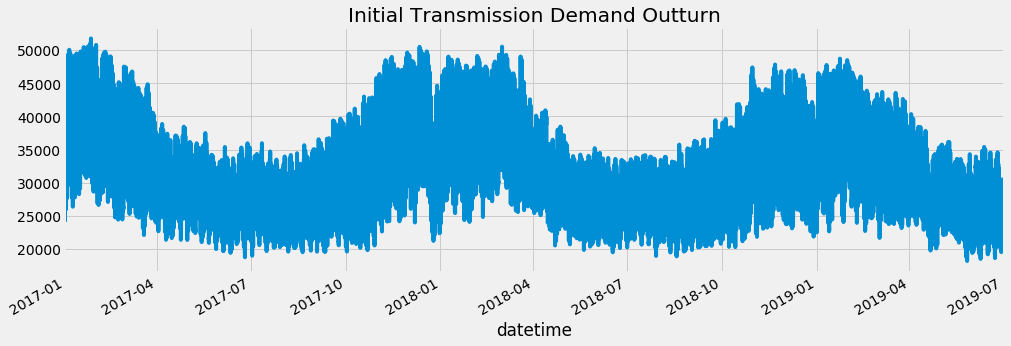

In [75]:
df['ITSDO'].plot(figsize=(15, 5), title = 'Initial Transmission Demand Outturn')

In [68]:
df_=pd.read_csv('INDO-2017-2019.csv',index_col=[0], parse_dates=[0])

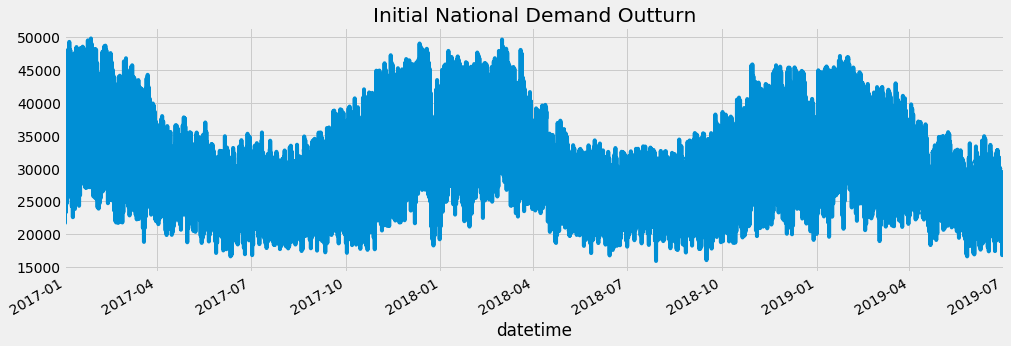

In [69]:
df_['INDO'].plot(figsize=(15, 5), title = 'Initial National Demand Outturn')